In [1]:
import numpy as np
import scipy.signal as signal
from  matplotlib import pyplot as plt
import librosa
from IPython.display import Audio

%matplotlib inline

In [3]:
# piano tone from https://www.audiolabs-erlangen.de/resources/MIR/FMP/C0/C0.html
# simple piano tone to analyze
Fs = 11025
sig, Fs = librosa.load('piano.wav', sr=Fs)
Audio(data=sig, rate=Fs)

#plt.plot(sig)

The Fourier Transform can decompose the tone into frequencies. However, it does not indicate when does frequencies occured. In musical terms, all the notes appear at once. The short time Fourier Transform is able to indicate when the frequencies occur. It divides the signal into shorter segments and does a Fourier Transform on each one. The Scipy Python Module provides a convenient function to compute the stft (and spectrogram).

Text(0.5, 1.0, 'Spectrogram of piano tone')

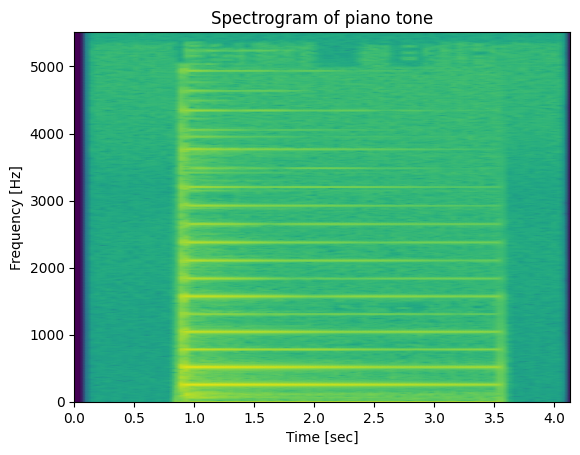

In [5]:

#f, t, Sxx = signal.spectrogram(sig, Fs,nperseg=1024)
f, t, Sxx = signal.stft(sig, Fs,nperseg=1024)
Sxx = np.abs(Sxx)
eps = np.finfo(float).eps
Sxx = 10 * np.log10(Sxx + eps)
plt.pcolormesh(t, f, Sxx, shading='gouraud',vmax=np.max(Sxx)/10)
#plt.imshow(Sxx, aspect='auto', origin='lower',cmap='gray_r',extent=[t.min(), t.max(), f.min(), f.max()])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("STFT of piano tone")
